In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output

In [2]:
products = pd.read_csv(r'C:\Users\HP\Desktop\project-2\prods.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [3]:
print(len(set(products["product_name"])))

1000


In [4]:
print(len(products["product_name"]))

1000


In [5]:
print(len(set(products["department_id"])))

21


In [6]:
print(len(products["department_id"]))

1000


<AxesSubplot:xlabel='aisle_id', ylabel='count'>

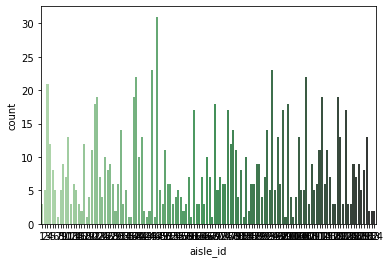

In [7]:
sns.countplot(x='aisle_id', data=products, palette="Greens_d")

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1000 non-null   int64 
 1   product_name   1000 non-null   object
 2   aisle_id       1000 non-null   int64 
 3   department_id  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [9]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.feature_extraction import text
product_names=products['product_name'].tolist()
tfidf=text.TfidfVectorizer(input=product_names,stop_words="english")
matrix=tfidf.fit_transform(product_names)
print(matrix.shape)

(1000, 1685)


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
sim_unigram=cosine_similarity(matrix)

In [12]:
def get_similar_products(x):
    return ",".join(products['product_name'].loc[x.argsort()[-5:-1]])
products['suggested_product_name']=[get_similar_products(x) for x in sim_unigram]

In [13]:
products['suggested_product_name'].str.upper().str.strip().str.split("\n")[1]

["THIN STACKERS BROWN RICE  SALT FREE,SARDINES IN WATER SALT ADDED,SALT FREE SEASONING,NATURE'S SEASONS SEASONING BLEND"]

In [14]:
products['suggested_product_name']

0      Oreo Cookies and Cream Chocolate Frozen Dairy ...
1      Thin Stackers Brown Rice  Salt Free,Sardines i...
2      Almond Breeze Unsweetened Almond Coconut Milk ...
3      Classic coke,Ice Cream, Cookies & Cream,Mini D...
4      Petite Green Peas,Caramel Sauce,Apple Green Cu...
                             ...                        
995    Ceylon Cinnamon,Low Fat Honey Graham Crackers,...
996    French Vanilla Ice Cream,Dark Chocolate Ice Cr...
997    Apple Green Cups,New Mexico Chili,White Chicke...
998    Candy, Original,Original Turkey,Sweet & Smokey...
999    Eco-Pac Kamut Puffs Cereal,Cheese Creations Fo...
Name: suggested_product_name, Length: 1000, dtype: object

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_id              1000 non-null   int64 
 1   product_name            1000 non-null   object
 2   aisle_id                1000 non-null   int64 
 3   department_id           1000 non-null   int64 
 4   suggested_product_name  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [16]:
products['product_id']=products['product_id'].apply(str)

In [17]:
products_id=products['product_id'].tolist()
tfidf_prods=text.TfidfVectorizer(input=products_id)
matrix_prods=tfidf_prods.fit_transform(products_id)
print(matrix_prods.shape)

(1000, 991)


In [18]:
sim_unigram_prod=cosine_similarity(matrix_prods)

In [19]:
def get_similar_products_id(x):
    return ",".join(products['product_id'].loc[x.argsort()[-5:-1]])
products['suggested_product_id']=[get_similar_products_id(x) for x in sim_unigram_prod]

In [20]:
products['suggested_product_id']

0       340,341,342,329
1       340,341,342,329
2       340,341,342,329
3       340,341,342,329
4       340,341,342,329
             ...       
995    340,341,328,1000
996    340,341,328,1000
997    340,341,328,1000
998     339,340,341,328
999     340,341,342,329
Name: suggested_product_id, Length: 1000, dtype: object

In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_id              1000 non-null   object
 1   product_name            1000 non-null   object
 2   aisle_id                1000 non-null   int64 
 3   department_id           1000 non-null   int64 
 4   suggested_product_name  1000 non-null   object
 5   suggested_product_id    1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [22]:
products['department_id']=products['department_id'].apply(str)

In [23]:
dept_id=products['department_id'].tolist()
tfidf_dept=text.TfidfVectorizer(input=dept_id)
matrix_dept=tfidf_dept.fit_transform(dept_id)
print(matrix_dept.shape)

(1000, 12)


In [24]:
sim_unigram_dept=cosine_similarity(matrix_dept)

In [25]:
def get_similar_products_id(x):
    return ",".join(products['department_id'].loc[x.argsort()[-5:-1]])
products['suggested_department_id']=[get_similar_products_id(x) for x in sim_unigram_dept]

In [26]:
products['suggested_department_id']

0      19,19,19,19
1      13,13,13,13
2        14,9,8,16
3        14,9,8,16
4      13,13,13,13
          ...     
995    19,19,19,19
996      14,9,8,16
997    13,13,13,13
998    13,13,13,13
999     14,9,17,10
Name: suggested_department_id, Length: 1000, dtype: object

In [27]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product_id               1000 non-null   object
 1   product_name             1000 non-null   object
 2   aisle_id                 1000 non-null   int64 
 3   department_id            1000 non-null   object
 4   suggested_product_name   1000 non-null   object
 5   suggested_product_id     1000 non-null   object
 6   suggested_department_id  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [28]:
products.head()

,product_id,product_name,aisle_id,department_id,suggested_product_name,suggested_product_id,suggested_department_id
0,1,Chocolate Sandwich Cookies,61,19,Oreo Cookies and Cream Chocolate Frozen Dairy ...,"340,341,342,329","19,19,19,19"
1,2,All-Seasons Salt,104,13,"Thin Stackers Brown Rice Salt Free,Sardines i...","340,341,342,329","13,13,13,13"
2,3,Robust Golden Unsweetened Oolong Tea,94,7,Almond Breeze Unsweetened Almond Coconut Milk ...,"340,341,342,329","14,9,8,16"
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,"Classic coke,Ice Cream, Cookies & Cream,Mini D...","340,341,342,329","14,9,8,16"
4,5,Green Chile Anytime Sauce,5,13,"Petite Green Peas,Caramel Sauce,Apple Green Cu...","340,341,342,329","13,13,13,13"
